In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

def initialise_state(desired_initial_state):
    n = int(round(np.log2(desired_initial_state.size)))
    
    # if 2**n != desired_initial_state.size:
        # don't run
    
    qc_init = QuantumCircuit(n)

    qc_init.initialize(desired_initial_state, range(n))
    return qc_init

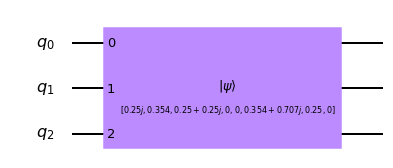

In [2]:
test_initial_state = np.array([
    1 / np.sqrt(16) * complex(0, 1),
    1 / np.sqrt(8) * complex(1, 0),
    1 / np.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / np.sqrt(8) * complex(1, 2),
    1 / np.sqrt(16) * complex(1, 0),
    0], dtype=complex)

qc_init = initialise_state(test_initial_state)
qc_init.draw('mpl')

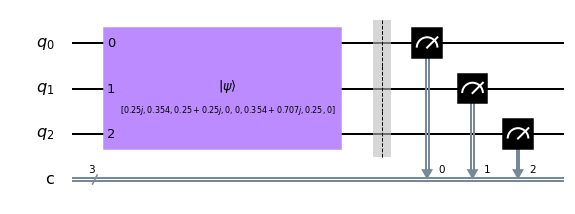

In [46]:
n = 3
shots0 = 1024

# Create a Quantum Circuit
meas = QuantumCircuit(n, n)
meas.barrier(range(n))
# map the quantum measurement to the classical bits
meas.measure(range(n), range(n))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = qc_init + meas

#drawing the circuit
qc.draw('mpl')

In [5]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=shots0)

# Grab the results from the job.
result_sim = job_sim.result()

{'000': 64, '001': 117, '010': 127, '101': 646, '110': 70}


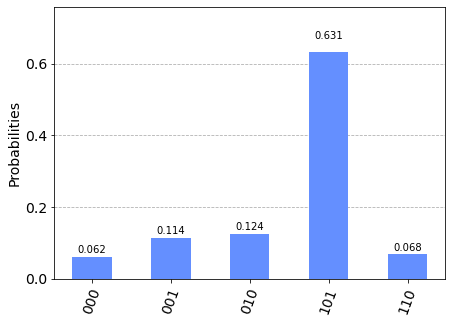

In [33]:
counts = result_sim.get_counts(qc)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [50]:
probability_vector = np.zeros(2**n)
int_counts = counts.int_outcomes() # this changes the keys in the count object to integers so we can iterate through it easily

for k in range(2**n):
    probability_vector[k] = int_counts.get(k, 0)

print(probability_vector)

[ 64. 117. 127.   0.   0. 646.  70.   0.]


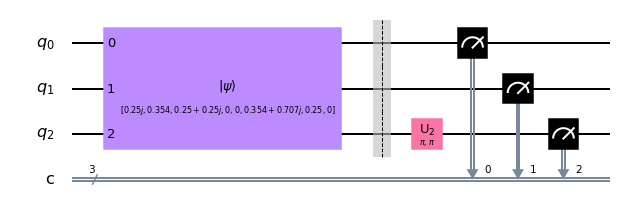

In [60]:
n = 3
shots0 = 1024

# Create a Quantum Circuit
meas_phi = QuantumCircuit(n, n)
meas_phi.barrier(range(n))
meas_phi.u2(np.pi, np.pi, n-1)
# map the quantum measurement to the classical bits
meas_phi.measure(range(n), range(n))

# The Qiskit circuit object supports composition using
# the addition operator.
qc_phi = qc_init + meas_phi

#drawing the circuit
qc_phi.draw('mpl')